# Importing libraries

In [106]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

## Reading dataset

In [107]:
df = pd.read_csv(r"C:\\Users\\msgok\Downloads\world_energy_data.csv")
df.head()

,Unnamed: 0,Coal Data,Unnamed: 2,Natural Gas,Unnamed: 4,Electricity,Unnamed: 6,Co2 Emissions
0,year,world_cons,world_prod,world_prod,world_cons,world_prod,world_cons,world
1,1990,4693,4698,2057,2047,11875,10120,20376
2,1991,4614,4526,2099,2107,12152,10436,20532
3,1992,4558,4478,2099,2101,12262,10525,20450
4,1993,4538,4361,2147,2136,12550,10724,20552


In [108]:
# Taking out the emission data
emission_df = df[['Unnamed: 0','Co2 Emissions']]

In [109]:
# Dropping reduntant rows
emission_df.drop([0,0],axis=0,inplace=True)

In [110]:
# changing column names
emission_df.columns = ['year','emission']

In [111]:
emission_df.head()

,year,emission
1,1990,20376
2,1991,20532
3,1992,20450
4,1993,20552
5,1994,20632


In [112]:
# chnging type of year column into datetime
emission_df['year'] = pd.to_datetime(emission_df['year'])

In [113]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      33 non-null     datetime64[ns]
 1   emission  33 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 792.0+ bytes


In [114]:
# changing data type into integer
emission_df['emission'] = emission_df.emission.astype(int)

In [115]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      33 non-null     datetime64[ns]
 1   emission  33 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 660.0 bytes


In [116]:
emission_df.describe()

,year,emission
count,33,33.000000
mean,2005-12-31 21:05:27.272727296,26818.151515
min,1990-01-01 00:00:00,20376.000000
25%,1998-01-01 00:00:00,22067.000000
50%,2006-01-01 00:00:00,27483.000000
75%,2014-01-01 00:00:00,31682.000000
max,2022-01-01 00:00:00,33811.000000
std,NaN,4767.207949


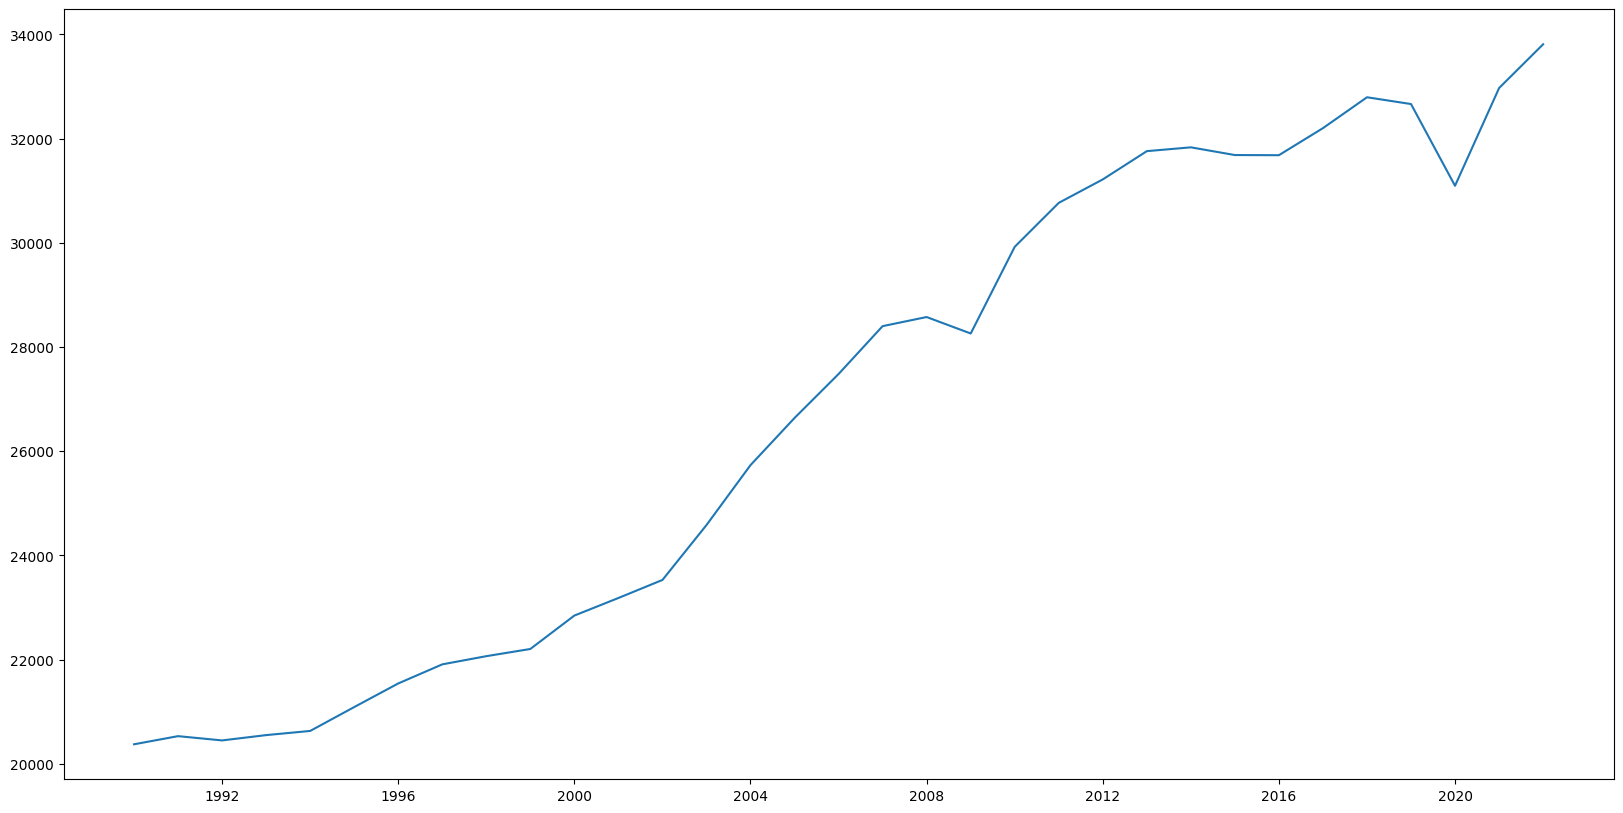

In [117]:
# plotting given data 
plt.figure(figsize=(20,10))
plt.plot('year','emission',data=emission_df)

In [118]:
import statsmodels.api as sm

In [119]:
# Performing durbin watson test to check the autocorrelation
sm.stats.durbin_watson(emission_df['emission'])

-0.013415542018681663

## Import Facebook Prophet Model

In [120]:
import prophet

In [121]:
#Renaming columns of dataset to use them into facebook prophet model
df_prophet = emission_df.rename(columns={'year':'ds', 'emission':'y'})

In [122]:
df_prophet.head()

,ds,y
1,1990-01-01,20376
2,1991-01-01,20532
3,1992-01-01,20450
4,1993-01-01,20552
5,1994-01-01,20632


In [123]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

02:25:14 - cmdstanpy - INFO - Chain [1] start processing
02:25:14 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [125]:
model

In [126]:
future_pred = model.make_future_dataframe(periods=10, freq='Y')

In [127]:
future_pred.tail(10)

,ds
33,2022-12-31
34,2023-12-31
35,2024-12-31
36,2025-12-31
37,2026-12-31
38,2027-12-31
39,2028-12-31
40,2029-12-31
41,2030-12-31
42,2031-12-31


## Predicting future forecasting

In [128]:
prediction = model.predict(future_pred)

In [129]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,-10242.907206,19483.858539,20624.582571,-10242.907206,-10242.907206,30276.291217,30276.291217,30276.291217,30276.291217,30276.291217,30276.291217,0.0,0.0,0.0,20033.384011
1,1991-01-01,-9971.021595,19720.071580,20822.219071,-9971.021595,-9971.021595,30228.018959,30228.018959,30228.018959,30228.018959,30228.018959,30228.018959,0.0,0.0,0.0,20256.997364


In [130]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
33,2022-12-31,30844.568213,30267.147292,31389.772642
34,2023-12-31,29791.837376,29229.503972,30345.027383
35,2024-12-31,33048.700711,32438.736735,33598.970595
36,2025-12-31,32475.894154,31882.828072,33055.654625
37,2026-12-31,31662.253817,31016.111377,32347.101532
38,2027-12-31,30609.522981,29915.581458,31351.575165
39,2028-12-31,33866.386316,33065.265714,34625.872181
40,2029-12-31,33293.579759,32409.900583,34187.757582
41,2030-12-31,32479.939422,31437.958727,33474.695221
42,2031-12-31,31427.208586,30294.265462,32548.266439


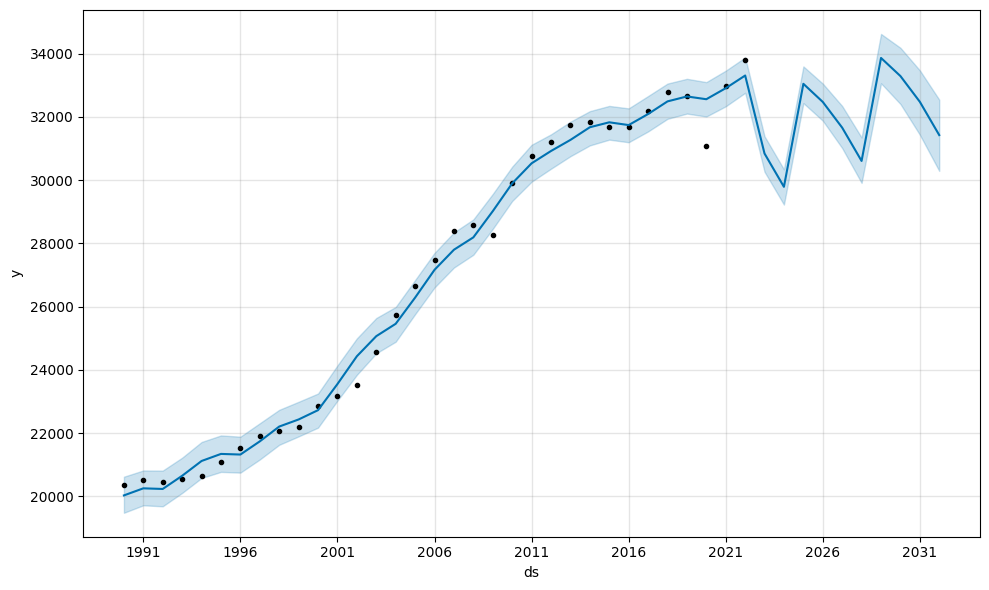

In [131]:
# plot the model 
model.plot(prediction)
plt.show()

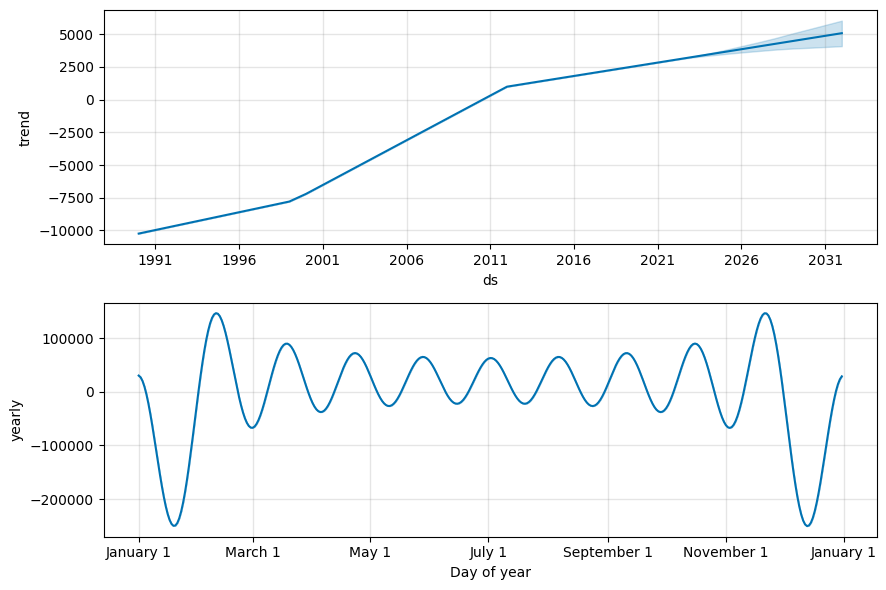

In [132]:
model.plot_components(prediction)
plt.show()

## To check the performance - cross validation and performance metrics

In [133]:
from prophet.diagnostics import cross_validation

In [134]:
df_cv = cross_validation(model, horizon='365 days', period='365 days', initial='1095 days')

  0%|          | 0/29 [00:00<?, ?it/s]

02:25:15 - cmdstanpy - INFO - Chain [1] start processing
02:25:15 - cmdstanpy - INFO - Chain [1] done processing
02:25:15 - cmdstanpy - INFO - Chain [1] start processing
02:25:20 - cmdstanpy - INFO - Chain [1] done processing
02:25:20 - cmdstanpy - INFO - Chain [1] start processing
02:25:20 - cmdstanpy - INFO - Chain [1] done processing
02:25:20 - cmdstanpy - INFO - Chain [1] start processing
02:25:27 - cmdstanpy - INFO - Chain [1] done processing
02:25:27 - cmdstanpy - INFO - Chain [1] start processing
02:25:32 - cmdstanpy - INFO - Chain [1] done processing
02:25:32 - cmdstanpy - INFO - Chain [1] start processing
02:25:37 - cmdstanpy - INFO - Chain [1] done processing
02:25:37 - cmdstanpy - INFO - Chain [1] start processing
02:25:42 - cmdstanpy - INFO - Chain [1] done processing
02:25:42 - cmdstanpy - INFO - Chain [1] start processing
02:25:42 - cmdstanpy - INFO - Chain [1] done processing
02:25:42 - cmdstanpy - INFO - Chain [1] start processing
02:25:42 - cmdstanpy - INFO - Chain [1]

In [135]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1994-01-01,20934.612684,20932.927646,20936.425195,20632,1993-01-08
1,1995-01-01,20565.656725,20516.366222,20614.112436,21090,1994-01-08
2,1996-01-01,21248.343840,21145.287084,21355.529482,21543,1995-01-08
3,1997-01-01,22103.815994,21996.180326,22216.668900,21910,1996-01-08
4,1998-01-01,22109.666659,21970.528695,22252.129197,22067,1997-01-07


In [136]:
from prophet.diagnostics import performance_metrics

In [137]:
df_performance = performance_metrics(df_cv)

In [138]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,358 days,1.511109e+05,388.729795,373.870707,0.017736,0.014667,0.017836,0.00
1,359 days,7.966824e+04,282.255636,205.295875,0.009112,0.005765,0.009168,0.50
2,360 days,2.084277e+05,456.538852,389.004945,0.015678,0.016817,0.015846,0.25
3,361 days,2.705859e+05,520.178733,391.312944,0.013920,0.008741,0.013795,0.25
4,362 days,7.182734e+05,847.510113,503.369483,0.017558,0.004528,0.017125,0.75
5,363 days,1.271997e+06,1127.828435,956.438268,0.030158,0.033257,0.029539,0.25
6,364 days,1.014649e+06,1007.297772,704.584707,0.022370,0.014287,0.021864,0.50
7,365 days,5.075368e+05,712.416150,701.548291,0.020966,0.020966,0.021195,0.00


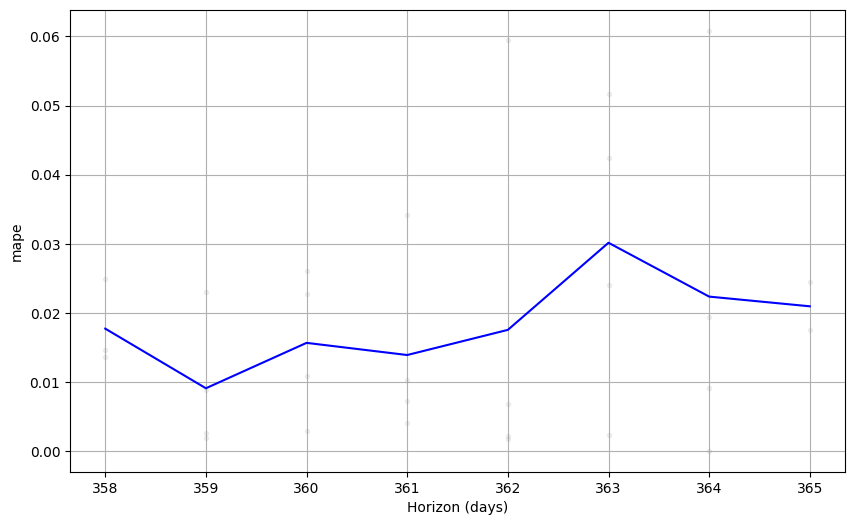

In [139]:
# Visualise
from prophet.plot import plot_cross_validation_metric
df_performance = plot_cross_validation_metric(df_cv, metric='mape')

In [140]:
# Constants
CO2_absorption_per_tree_per_year = 22.6  # Example value in kilograms per year

# Convert yhat_upper values from kilograms to million tons (assuming 1 ton = 1000 kilograms)
yhat_upper_values_million_tons = yhat_upper_values / 1e6

# Calculate the mean value of yhat_upper in million tons
mean_value_million_tons = yhat_upper_values_million_tons.mean()

# Format the mean value with two decimal places
formatted_value = "{:.2f}".format(mean_value_million_tons)

if mean_value_million_tons >= 100:
    # Convert mean value to billion and format it with a decimal after two digits
    total_world_CO2_emissions_billion = mean_value_million_tons / 1e3
    formatted_value = "{:.2f}".format(total_world_CO2_emissions_billion)
    print(f"Total world CO2 emissions in the next 10 years (predicted using yhat_upper): {formatted_value} billion tons")
else:
    print(f"Total world CO2 emissions in the next 10 years (predicted using yhat_upper): {formatted_value} billion tons")

# Calculate the number of trees required to offset CO2 emissions
trees_required = mean_value_million_tons * 1e6 / CO2_absorption_per_tree_per_year

# Output the number of trees required
print(f"Number of trees required to offset CO2 emissions: {trees_required:.0f}")


Total world CO2 emissions in the next 10 years (predicted using yhat_upper): 0.03 billion tons
Number of trees required to offset CO2 emissions: 1446
